In [1]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

How Tablet use affect students' score?

Tablet is affected by Tuition: 
```
Tuition -> Tablet
Tuition -> Score
Tablet -> Score
```

In [2]:
style.use("fivethirtyeight")

np.random.seed(123)
n = 100
tuition = np.random.normal(1000, 300, n).round()
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)
enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))

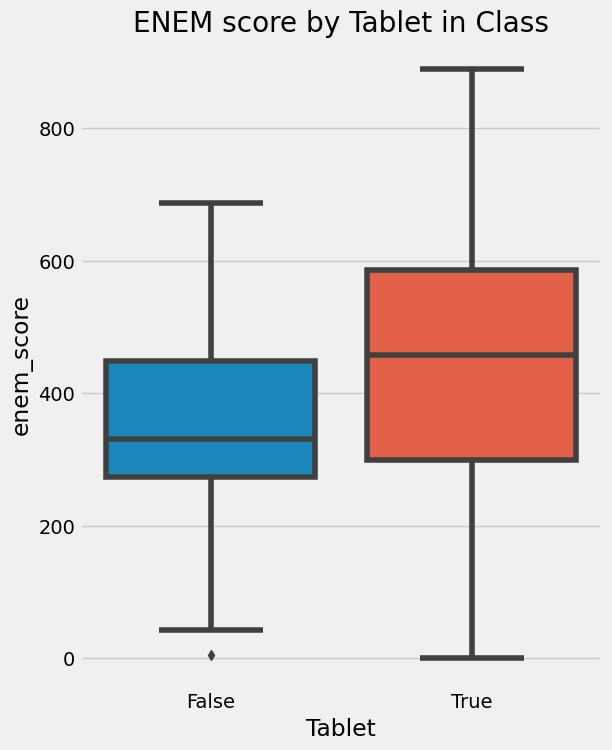

In [4]:
plt.figure(figsize=(6,8))
sns.boxplot(y="enem_score", x="Tablet", data=data).set_title('ENEM score by Tablet in Class')
plt.show()

# Association is not Causation

In the assocaiation formula when measuring treatment effect

$$E[Y|T_1] - E[Y|T_0] = E[Y_1|T_1] - E[Y_0|T_0] - E[Y_0 | T_1] + E[Y_0 | T_1]$$

Where $E[Y_0 | T_1]$ is the counterfactual of the effect of not receiving a treatment in a treatment group. When reordered:

$$E[Y|T_1] - E[Y|T_0] = (E[Y_1|T_1] - E[Y_0 | T_1]) + (E[Y_0 | T_1] - E[Y_0|T_0])$$

Where $(E[Y_1|T_1] - E[Y_0 | T_1])$ is the real treatment effect $ATT$(average treatment effect on the treated), and $E[Y_0 | T_1] - E[Y_0|T_0]$ is the bias. The __bias is caused by the difference in nature of the treatment and control group if they do not receive treatment__.

The bias arise when __something other than treatment affects the treated and untreated differently in terms of the outcome $Y$__.

> Causal inference is about finding the true treatment effect stripped of all biases.